# Fitting lines and least squares optimization using Numpy and SciPy

Several times in this class, we will want to use fitting tools to find a model or to calibrate data. 

Let's start with a linear 1-dimensional example, where we're trying to fit a line to a set of data with points x and y such that 
\begin{equation}
    y - (mx + b) = 0
\end{equation}
where we want to find values for the slope m and the y-intercept b that minimizes the difference between y and mx+b.

As always, we need to start with the packages we'll need:

In [ ]:
import sys #You will not need to include this line in your driver file
!{sys.executable} -m pip install numpy #You will not need to include this line in your driver file
!{sys.executable} -m pip install scipy #You will not need to include this line in your driver file
!{sys.executable} -m pip install matplotlib #You will not need to include this line in your driver file

Let's make a noisy line.

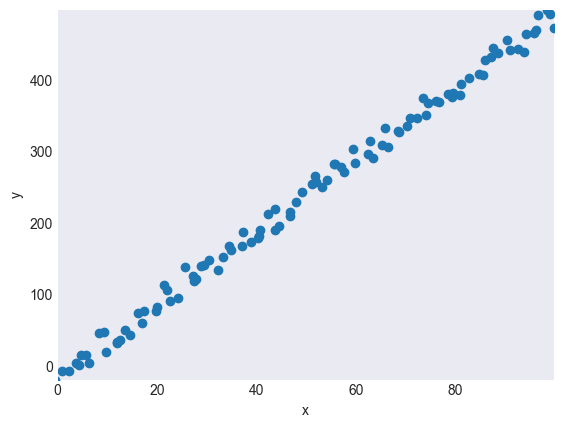

In [6]:
import numpy as np
from scipy.optimize import least_squares 
import matplotlib.pyplot as plt

#Make a noisy y = 5*x -10, where m = 5 and b = -10
x = np.linspace(0, 100, 100) + np.random.uniform(-1,1,100) #Create an array-like of x with some uniform randomness centered around 0
y = 5*x + np.random.uniform(-20,20,100) - 10 #Create an array-like of y with some uniform randomness centered around 0

#Plot settings
plt.style.use("seaborn-v0_8-dark")
fig, axs = plt.subplots()

axs.scatter(x, y)
axs.set(xlim = (0,np.amax(x)), ylim = (np.amin(y), np.amax(y))) #set axis limits
plt.ylabel('y')
plt.xlabel('x')
plt.show()

We have two tools we can use to fit to this line: <code>numpy.polyfit</code> and <code>scipy.optimize.least_squares</code>. Let's start with an example of how to fit using <code>numpy.polyfit</code>. We can simply call polyfit with a polynomial degree of "1"

The fitted slope of the line is 5.068649799156041 and the y-intercept is -15.058038179871762


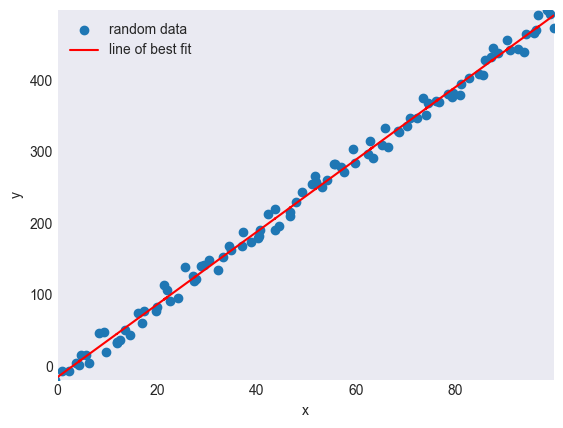

In [36]:
z = np.polyfit(x, y, 1)
print("The fitted slope of the line is " + str(z[0])+ " and the y-intercept is " + str(z[1]))

#Plot settings
plt.style.use("seaborn-v0_8-dark")
fig, axs = plt.subplots()

model_y = z[0] * x + z[1]

axs.scatter(x, y, label = "random data")
axs.plot(x, model_y, 'r', label = "line of best fit")
axs.set(xlim = (0,np.amax(x)), ylim = (np.amin(y), np.amax(y))) #set axis limits
plt.ylabel('y')
plt.xlabel('x')
axs.legend()
plt.show()

Not exactly the parameters we started with, but those are the ones that minimize the error (give it the best fit).

We can use another tool to fit the data, which works for polynomial functions as well as other data, using <code>scipy.optimize.least_squares</code>

We start by defining a function in Python that we can call: 

In [30]:
def model(x, model_params):
    m = model_params[0]
    b = model_params[1]
    y =  m * x + b
    y = np.array(y)
    return y

This model can be anything we want. It doesn't need to be a line. We can the set up the function we are trying to minimize: 

In [31]:
def residual(initial_guesses, x, y):
    return (y - model(x, initial_guesses)).flatten()

We can then use least squares optimization to find the values of 𝑚 and 𝑏 that minimize the least squares difference between our model (i.e., $y=mx+b$) and measured data with

In [32]:
guesses = [0,0]
lsq_min = least_squares(residual, guesses , args=(x, y))

We can get the numerical values of m and b that minimize the error between x and y through

In [33]:
my_model_vals = lsq_min.x
print(my_model_vals)

[  5.0686498  -15.05803816]


For simple polynomial function fitting, polyfit is fine. 

For more documentation, see the scipy documentation on least squares optimization: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html